In [2]:
import numpy as np
import numpy.random as npr

import torch

import matplotlib.pyplot as plt

In [1]:
def sin_dataset(n_sin=5, n_total=300, amp_label='low', freq_label='low'):
    start = 0.
    stop = 3.
    orig_ts = np.linspace(start, stop, n_total)
    
    sinusoidals = []
    dilations = []
    amplitudes = []
    
    for i in range(n_sin):
        if amp_label == 'low':
            amp = [np.around(npr.uniform(1, 3), 1) for i in range(6)]
        elif amp_label == 'high':
            amp = [np.around(npr.uniform(6, 8), 1) for i in range(6)]
        if freq_label == 'low':
            freq = [npr.randint(1, 3) for i in range(6)]
        elif freq_label == 'high':
            freq = [npr.randint(6, 8) for i in range(6)]
            
        sinusoidal = amp[0] * np.sin(freq[0] * orig_ts * 2 * np.pi) + amp[1] * np.sin(freq[1] *orig_ts * 2 * np.pi) +\
        amp[2] * np.sin(freq[2] * orig_ts *2 * np.pi) + amp[3] * np.cos(freq[3] * orig_ts *2 * np.pi) + amp[4] * np.cos(freq[4] *orig_ts * 2* np.pi) +\
        amp[5] * np.cos(freq[5] *orig_ts * 2 * np.pi)
        
        sinusoidal += np.random.randn(*sinusoidal.shape) * 0.3
        sinusoidals.append(sinusoidal)
        dilations.append(freq)
        amplitudes.append(amp)
    
    sinusoidals = np.stack(sinusoidals, axis=0)
    sinusoidals = torch.unsqueeze(torch.Tensor(sinusoidals), dim=-1)
    dilations = np.stack(dilations, axis=0)
    amplitudes = np.stack(amplitudes, axis=0)
    
    return sinusoidals, dilations, amplitudes, torch.Tensor([orig_ts])
            

In [3]:
# low amplitude & low frequency
ll_sin, ll_dilations, ll_amplitude, ll_orig_ts = sin_dataset(n_sin=500, n_total=300, amp_label='low', freq_label='low')
ll_y_label = np.array([0] * 500)
# low amplitude & high frequency
lh_sin, lh_dilations, lh_amplitude, lh_orig_ts = sin_dataset(n_sin=500, n_total=300, amp_label='low', freq_label='high')
lh_y_label = np.array([1] * 500)
# high amplitude & low frequency
hl_sin, hl_dilations, hl_amplitude, hl_orig_ts = sin_dataset(n_sin=500, n_total=300, amp_label='high', freq_label='low')
hl_y_label = np.array([2] * 500)
# high amplitude & high frequency
hh_sin, hh_dilations, hh_amplitude, hh_orig_ts = sin_dataset(n_sin=500, n_total=300, amp_label='high', freq_label='high')
hh_y_label = np.array([3] * 500)

In [4]:
train_sin = torch.cat((ll_sin, lh_sin, hl_sin, hh_sin), dim=0)
train_dilations = np.concatenate((ll_dilations, lh_dilations, hl_dilations, hh_dilations), axis=0)
train_amplitudes = np.concatenate((ll_amplitude, lh_amplitude, hl_amplitude, hh_amplitude), axis=0)
train_label = np.concatenate((ll_y_label, lh_y_label, hl_y_label, hh_y_label), axis=0)

In [5]:
train_dataset = {'train_sin': train_sin, 
                'train_freq': train_dilations,
                'train_amp': train_amplitudes,
                'orig_ts': ll_orig_ts[0],
                'train_label': train_label}

In [6]:
# low amplitude & low frequency
ll_sin, ll_dilations, ll_amplitude, ll_orig_ts = sin_dataset(n_sin=125, n_total=300, amp_label='low', freq_label='low')
ll_y_label = np.array([0]*125)

# low amplitude & high frequency
lh_sin, lh_dilations, lh_amplitude, lh_orig_ts = sin_dataset(n_sin=125, n_total=300, amp_label='low', freq_label='high')
lh_y_label = np.array([1]*125)

# high amplitude & low frequency
hl_sin, hl_dilations, hl_amplitude, hl_orig_ts = sin_dataset(n_sin=125, n_total=300, amp_label='high', freq_label='low')
hl_y_label = np.array([2]*125)

# high amplitude & high frequency
hh_sin, hh_dilations, hh_amplitude, hh_orig_ts = sin_dataset(n_sin=125, n_total=300, amp_label='high', freq_label='high')
hh_y_label = np.array([3]*125)

In [7]:
eval_sin = torch.cat((ll_sin, lh_sin, hl_sin, hh_sin), dim=0)
eval_dilations = np.concatenate((ll_dilations, lh_dilations, hl_dilations, hh_dilations), axis=0)
eval_amplitudes = np.concatenate((ll_amplitude, lh_amplitude, hl_amplitude, hh_amplitude), axis=0)
eval_label = np.concatenate((ll_y_label, lh_y_label, hl_y_label, hh_y_label), axis=0)

In [8]:
eval_dataset = {'eval_sin': eval_sin, 
                'eval_freq': eval_dilations,
                'eval_amp': eval_amplitudes,
                'orig_ts': ll_orig_ts[0],
               'eval_label': eval_label}

In [9]:
# low amplitude & low frequency
ll_sin, ll_dilations, ll_amplitude, ll_orig_ts = sin_dataset(n_sin=125, n_total=300, amp_label='low', freq_label='low')
ll_y_label = np.array([0]*125)

# low amplitude & high frequency
lh_sin, lh_dilations, lh_amplitude, lh_orig_ts = sin_dataset(n_sin=125, n_total=300, amp_label='low', freq_label='high')
lh_y_label = np.array([1] * 125)

# high amplitude & low frequency
hl_sin, hl_dilations, hl_amplitude, hl_orig_ts = sin_dataset(n_sin=125, n_total=300, amp_label='high', freq_label='low')
hl_y_label = np.array([2] * 125)

# high amplitude & high frequency
hh_sin, hh_dilations, hh_amplitude, hh_orig_ts = sin_dataset(n_sin=125, n_total=300, amp_label='high', freq_label='high')
hh_y_label = np.array([3] * 125)

In [10]:
test_sin = torch.cat((ll_sin, lh_sin, hl_sin, hh_sin), dim=0)
test_dilations = np.concatenate((ll_dilations, lh_dilations, hl_dilations, hh_dilations), axis=0)
test_amplitudes = np.concatenate((ll_amplitude, lh_amplitude, hl_amplitude, hh_amplitude), axis=0)
test_label = np.concatenate((ll_y_label, lh_y_label, hl_y_label, hh_y_label), axis=0)

In [11]:
test_dataset = {'test_sin': test_sin, 
                'test_freq': test_dilations,
                'test_amp': test_amplitudes,
                'orig_ts': ll_orig_ts[0],
               'test_label': test_label}

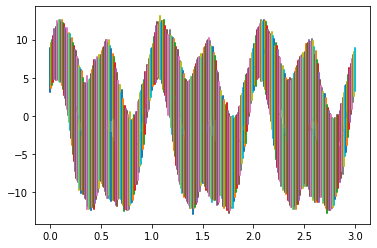

In [12]:
# visualize results
import matplotlib.pyplot as plt
plt.plot(np.repeat(ll_orig_ts.numpy(), 500, axis=0), train_sin[:500].squeeze())
plt.show()

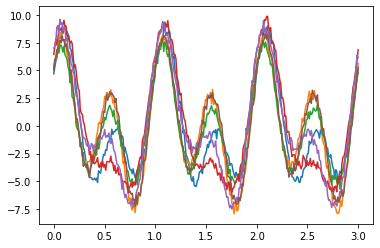

In [15]:
plt.plot(ll_orig_ts[0], train_sin[0].squeeze())
plt.plot(ll_orig_ts[0], train_sin[1].squeeze())
plt.plot(ll_orig_ts[0], train_sin[2].squeeze())
plt.plot(ll_orig_ts[0], train_sin[3].squeeze())
plt.plot(ll_orig_ts[0], train_sin[4].squeeze())
plt.plot(ll_orig_ts[0], train_sin[5].squeeze())
plt.show()

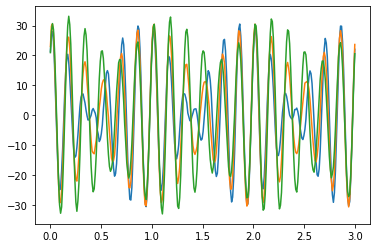

In [14]:
plt.plot(ll_orig_ts[0], train_sin[-1].squeeze())
plt.plot(ll_orig_ts[0], train_sin[-2].squeeze())
plt.plot(ll_orig_ts[0], train_sin[-3].squeeze())
plt.show()

In [16]:
import pickle
pickle.dump(train_dataset, open('./data/generativeODE/sin_train_data.pk', 'wb'))
pickle.dump(eval_dataset, open('./data/generativeODE/sin_eval_data.pk', 'wb'))
pickle.dump(test_dataset, open('./data/generativeODE/sin_test_data.pk', 'wb'))